In [1]:
# %% includes
import os.path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import csv
import datetime as dt
from datetime import timedelta
from datetime import datetime
#import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from pandas import DataFrame
from pandas import concat
# Import Libraries and packages from Keras
from scipy import stats
from matplotlib.colors import ListedColormap
from matplotlib.pyplot import figure
from scipy.stats.stats import pearsonr


import time
import pylab as pl
from IPython import display
from tabulate import tabulate


# r² : BP-corr. coeff

$$ r^2 =  \frac{\sum_{i=1}^n (O_i- \overline{O})(P_i- \overline{P})} {\sqrt{\sum_{i=1}^n(O_i- \overline{O})^2}\sqrt{\sum_{i=1}^n(P_i- \overline{P})^2}}  $$

In [2]:
def BravaisPearson_corr(observed, predicted):
    #means
    mean_observed = observed.mean()
    mean_predicted = predicted.mean()

    #diff between objeckt_i and mean of the objects
    o_diff_part = (observed-mean_observed)
    p_diff_part = (predicted-mean_predicted)

    #counter
    counter_o_p_mult = o_diff_part*p_diff_part
    counter = np.sum(counter_o_p_mult)

    #denominator
    denominator_o_part = np.sqrt(np.sum(np.square(o_diff_part)))
    denominator_p_part = np.sqrt(np.sum(np.square(p_diff_part)))
    denominator = denominator_o_part*denominator_p_part
    r_square = np.sqrt((counter/denominator)*(counter/denominator))
    
    return r_square

# E: Nash Sucliffe efficiency 
## $$ E =  1 - \frac{\sum_{i=1}^n (O_i- P_i)^2} {\sum_{i=1}^n (O_i- \overline{O})^2}  $$
#### $$E \in [1: -\infty )$$ $$ 1: total fit$$  $$-\infty : no fit$$ $$ E < 0 : "worse\_than\_average"$$

In [3]:
def NSE(observed, predicted):

    mean_observed = observed.mean()

    #counter
    counter = np.sum((np.square(observed-predicted)))

    #denominator
    denominator = np.sum(np.square(observed-mean_observed))

    #E

    E = 1-counter/denominator

    return E

# d: Index of agreement

## $$ d =1-  \frac{\sum_{i=1}^n (O_i- P_i)^2} {\sum_{i=1}^n (|P_i- \overline{O}|+|P_i- \overline{O}|)^2}  $$

### $$d \in [1: 0 ]$$ $$ 1: total fit$$  $$0: no fit$$ 


In [4]:
def IoD(observed, predicted):

    mean_observed = observed.mean()

    #counter
    counter = np.sum(np.square(observed-predicted))

    #denominator
    denominator = np.sum(np.square(abs(predicted-mean_observed) + abs(observed-mean_observed)))

    #d
    d = 1 - counter/denominator
    
    return d


# modified E
## $$ E_{mod} =  1 - \frac{\sum_{i=1}^n |O_i- P_i|^J} {\sum_{i=1}^n |O_i- \overline{O}|^J}  $$


In [5]:
def NSE_mod(observed, predicted, J):


    mean_observed = observed.mean()

    #counter
    counter = np.sum(pow(abs(observed-predicted), J))

    #denominator
    denominator = np.sum(pow(abs(observed-mean_observed), J))

    #E

    E = 1-counter/denominator

    return E

# modified d:

## $$ d_{mod} = 1- \frac{\sum_{i=1}^n |O_i- P_i|^J} {\sum_{i=1}^n (|P_i- \overline{O}|+|P_i- \overline{O}|)^J}  $$


In [6]:
def IoD_mod(observed, predicted, J):

    mean_observed = observed.mean()

    #counter
    counter = np.sum(pow(abs(observed-predicted), J))

    #denominator
    denominator = np.sum(pow((abs(predicted-mean_observed) + abs(observed-mean_observed)), J))



    #d
    d = 1 - counter/denominator

    return d


# $$E_{rel}$$
## $$ E_{rel} =  1 - \frac{\sum_{i=1}^n (\frac{ O_i- P_i}{O_i})^2} {\sum_{i=1}^n (\frac{ O_i- \overline{O}}{\overline{O}})^2}  $$


In [7]:
def NSE_rel(observed, predicted):

    mean_observed = observed.mean()

    # counter
    counter = np.sum(pow( (observed-predicted)  / observed ,2))

    #denominator
    denominator = np.sum(pow( (observed-mean_observed)  / mean_observed ,2))

    E_rel = 1 - (counter/denominator)

    return E_rel

# $$d_{rel}$$

## $$ d_{rel} =1-  \frac{\sum_{i=1}^n \frac{(O_i- P_i)^2}{O_i}} {\sum_{i=1}^n (\frac{|P_i- \overline{O}|+|P_i- \overline{O}|}{\overline{O}})^2}  $$


In [8]:
def  IoD_rel(observed, predicted):
    mean_observed = observed.mean()


    #counter
    counter = np.sum(pow((observed-predicted)/observed,2))
    #denominator
    denominator = np.sum(pow(((abs(predicted-mean_observed)+abs(observed-mean_observed))/mean_observed),2))
    #d_rel
    d_rel =1- counter / denominator
    return d_rel

### calling all functions

In [9]:
def execute_evaluation(observed, predicted, J):
    BPC_loc = pearsonr(observed, predicted)[0] # can also become negative since used from scipy
    NSE_loc = NSE(observed, predicted)
    IoD_loc = IoD(observed, predicted)
    NSE_mod_loc = NSE_mod(observed, predicted, J)
    IoD_mod_loc = IoD_mod(observed, predicted, J)
    NSE_rel_loc = NSE_rel(observed, predicted)
    IoD_rel_loc = IoD_rel(observed, predicted)
    return BPC_loc, NSE_loc,IoD_loc, NSE_mod_loc, IoD_mod_loc, NSE_rel_loc, IoD_rel_loc

def name_values(vall_array):
    vall_list = list([
                     ["BravaisPearson_corr",vall_array[0]],
                     ["NSE",vall_array[1]],
                     ["IoD",vall_array[2]],
                     ["NSE_mod",vall_array[3]],
                     ["IoD_mod",vall_array[4]],
                     ["NSE_rel",vall_array[5]],
                     ["IoD_rel",vall_array[6]]
    ])
    return vall_list
    

### Presentation of metrics minimal example

#### negative correlation

In [10]:
df_test = pd.DataFrame({'mesured': [1, 2, 3,4,5,6,7,8,9,10], 'predicted': [10,9,8,7,6,5,4,3,2, 1]})
df_test.plot()
plt.show()

J_mod = 3

df_2h_ev = execute_evaluation(observed = df_test['mesured'] , predicted = df_test['predicted'], J = J_mod)
ComparisonCriteria_Names = list(["BravaisPearson_corr","(E)NSE","(d)IoA","(E)NSE_mod_J="+str(J_mod),"(d)IoA_mod_J="+str(J_mod),"(E)NSE_rel","(d)IoA_rel"])
cethegorical_index = pd.CategoricalIndex(ComparisonCriteria_Names)
Mesurement_df = pd.DataFrame( data = {"negative correlation":df_2h_ev,
                                     }, index = cethegorical_index)
print(tabulate(Mesurement_df , headers='keys', tablefmt='psql'))

+---------------------+------------------------+
|                     |   negative correlation |
|---------------------+------------------------|
| BravaisPearson_corr |               -1       |
| (E)NSE              |               -3       |
| (d)IoA              |                0       |
| (E)NSE_mod_J=3      |               -7       |
| (d)IoA_mod_J=3      |                0       |
| (E)NSE_rel          |              -35.1707  |
| (d)IoA_rel          |               -8.04267 |
+---------------------+------------------------+


#### exact correltation


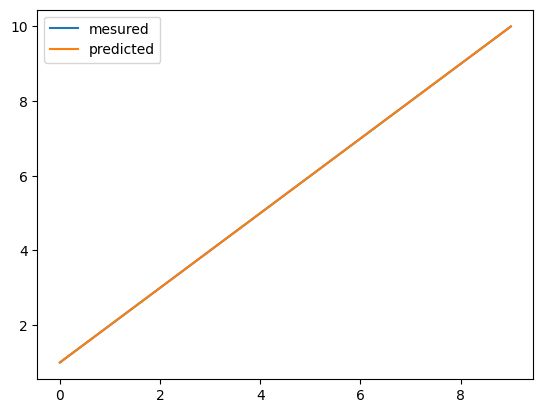

+---------------------+---------------------+
|                     |   total correlation |
|---------------------+---------------------|
| BravaisPearson_corr |                   1 |
| (E)NSE              |                   1 |
| (d)IoA              |                   1 |
| (E)NSE_mod_J=3      |                   1 |
| (d)IoA_mod_J=3      |                   1 |
| (E)NSE_rel          |                   1 |
| (d)IoA_rel          |                   1 |
+---------------------+---------------------+


In [11]:
df_test = pd.DataFrame({'mesured': [1, 2, 3,4,5,6,7,8,9,10], 'predicted': [1, 2, 3,4,5,6,7,8,9,10]})
df_test.plot()
plt.show()

J_mod = 3

df_2h_ev = execute_evaluation(observed = df_test['mesured'] , predicted = df_test['predicted'], J = J_mod)
ComparisonCriteria_Names = list(["BravaisPearson_corr","(E)NSE","(d)IoA","(E)NSE_mod_J="+str(J_mod),"(d)IoA_mod_J="+str(J_mod),"(E)NSE_rel","(d)IoA_rel"])
cethegorical_index = pd.CategoricalIndex(ComparisonCriteria_Names)
Mesurement_df = pd.DataFrame( data = {"total correlation":df_2h_ev,
                                     }, index = cethegorical_index)
print(tabulate(Mesurement_df , headers='keys', tablefmt='psql'))

#### light discrepance

In [12]:
df_test = pd.DataFrame({'mesured': [1,1,1,1,1,1,1,10], 'predicted': [1,1,1,1,1,1,1,15]})
df_test.plot()
plt.show()

J_mod = 3

df_2h_ev = execute_evaluation(observed = df_test['mesured'] , predicted = df_test['predicted'], J = J_mod)
ComparisonCriteria_Names = list(["BravaisPearson_corr","(E)NSE","(d)IoA","(E)NSE_mod_J="+str(J_mod),"(d)IoA_mod_J="+str(J_mod),"(E)NSE_rel","(d)IoA_rel"])
cethegorical_index = pd.CategoricalIndex(ComparisonCriteria_Names)
Mesurement_df = pd.DataFrame( data = {"light diff peaks":df_2h_ev,
                                     }, index = cethegorical_index)
print(tabulate(Mesurement_df , headers='keys', tablefmt='psql'))

+---------------------+--------------------+
|                     |   light diff peaks |
|---------------------+--------------------|
| BravaisPearson_corr |           1        |
| (E)NSE              |           0.647266 |
| (d)IoA              |           0.946352 |
| (E)NSE_mod_J=3      |           0.749167 |
| (d)IoA_mod_J=3      |           0.986133 |
| (E)NSE_rel          |           0.984072 |
| (d)IoA_rel          |           0.997577 |
+---------------------+--------------------+


#### high discrepance

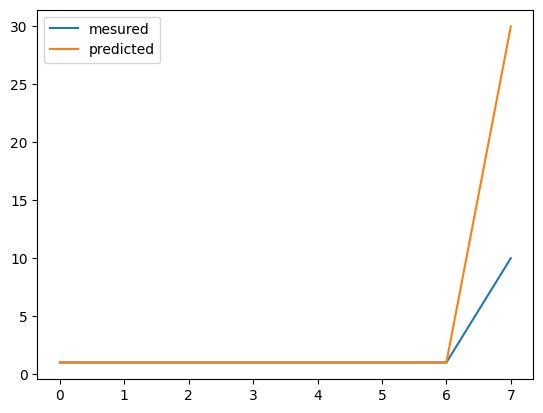

+---------------------+-------------------+
|                     |   high diff peaks |
|---------------------+-------------------|
| BravaisPearson_corr |          1        |
| (E)NSE              |         -4.64374  |
| (d)IoA              |          0.69547  |
| (E)NSE_mod_J=3      |        -15.0533   |
| (d)IoA_mod_J=3      |          0.825215 |
| (E)NSE_rel          |          0.74515  |
| (d)IoA_rel          |          0.986249 |
+---------------------+-------------------+


In [13]:
df_test = pd.DataFrame({'mesured': [1,1,1,1,1,1,1,10], 'predicted': [1,1,1,1,1,1,1,30]})
df_test.plot()
plt.show()

J_mod = 3

df_2h_ev = execute_evaluation(observed = df_test['mesured'] , predicted = df_test['predicted'], J = J_mod)
ComparisonCriteria_Names = list(["BravaisPearson_corr","(E)NSE","(d)IoA","(E)NSE_mod_J="+str(J_mod),"(d)IoA_mod_J="+str(J_mod),"(E)NSE_rel","(d)IoA_rel"])
cethegorical_index = pd.CategoricalIndex(ComparisonCriteria_Names)
Mesurement_df = pd.DataFrame( data = {"high diff peaks":df_2h_ev,
                                     }, index = cethegorical_index)
print(tabulate(Mesurement_df , headers='keys', tablefmt='psql'))

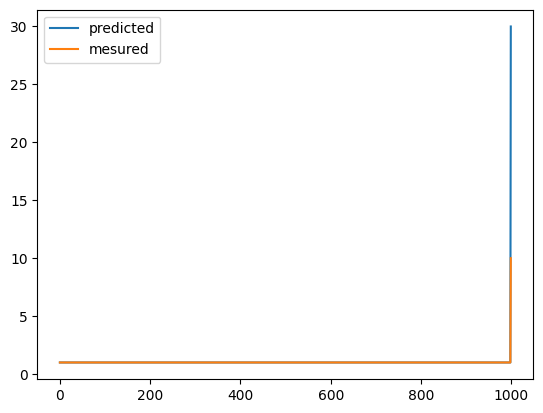

+---------------------+-------------------------------+
|                     |   high diff peaks 10^3-arrray |
|---------------------+-------------------------------|
| BravaisPearson_corr |                      1        |
| (E)NSE              |                     -3.94321  |
| (d)IoA              |                      0.722791 |
| (E)NSE_mod_J=3      |                    -10.0069   |
| (d)IoA_mod_J=3      |                      0.853999 |
| (E)NSE_rel          |                      0.949674 |
| (d)IoA_rel          |                      0.997178 |
+---------------------+-------------------------------+


In [14]:
##bigger array
df_test = pd.DataFrame(1, index=np.arange(0,1000), columns={'mesured','predicted'})
#df_test['predicted']=df_test['predicted']+1
df_test['mesured'][df_test['predicted'].size-1] = 10
df_test['predicted'][df_test['predicted'].size-1] = 30
#pd.DataFrame({'mesured': [1,1,1,1,1,1,1,10], 'predicted': [2,2,2,2,2,2,2,10]})
df_test.plot()
plt.show()

J_mod = 3

df_2h_ev = execute_evaluation(observed = df_test['mesured'] , predicted = df_test['predicted'], J = J_mod)
ComparisonCriteria_Names = list(["BravaisPearson_corr","(E)NSE","(d)IoA","(E)NSE_mod_J="+str(J_mod),"(d)IoA_mod_J="+str(J_mod),"(E)NSE_rel","(d)IoA_rel"])
cethegorical_index = pd.CategoricalIndex(ComparisonCriteria_Names)
Mesurement_df = pd.DataFrame( data = {"high diff peaks 10^3-arrray":df_2h_ev,
                                     }, index = cethegorical_index)
print(tabulate(Mesurement_df , headers='keys', tablefmt='psql'))

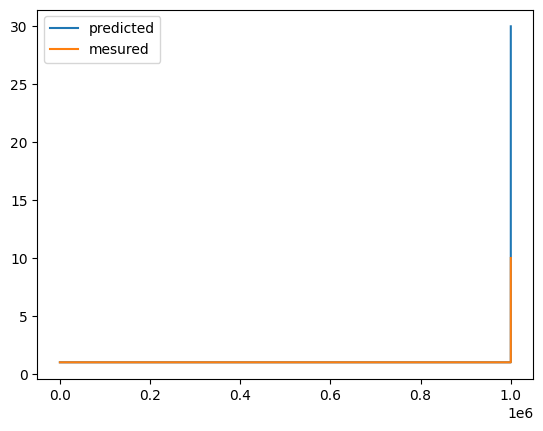

+---------------------+-------------------------------+
|                     |   high diff peaks 10^6-arrray |
|---------------------+-------------------------------|
| BravaisPearson_corr |                      1        |
| (E)NSE              |                     -3.93828  |
| (d)IoA              |                      0.722991 |
| (E)NSE_mod_J=3      |                     -9.97397  |
| (d)IoA_mod_J=3      |                      0.854206 |
| (E)NSE_rel          |                      0.950616 |
| (d)IoA_rel          |                      0.99723  |
+---------------------+-------------------------------+


In [15]:
##bigger array
df_test = pd.DataFrame(1, index=np.arange(0,1000000), columns={'mesured','predicted'})
#df_test['predicted']=df_test['predicted']+1
df_test['mesured'][df_test['predicted'].size-1] = 10
df_test['predicted'][df_test['predicted'].size-1] = 30
#pd.DataFrame({'mesured': [1,1,1,1,1,1,1,10], 'predicted': [2,2,2,2,2,2,2,10]})
df_test.plot()
plt.show()

J_mod = 3

df_2h_ev = execute_evaluation(observed = df_test['mesured'] , predicted = df_test['predicted'], J = J_mod)
ComparisonCriteria_Names = list(["BravaisPearson_corr","(E)NSE","(d)IoA","(E)NSE_mod_J="+str(J_mod),"(d)IoA_mod_J="+str(J_mod),"(E)NSE_rel","(d)IoA_rel"])
cethegorical_index = pd.CategoricalIndex(ComparisonCriteria_Names)
Mesurement_df = pd.DataFrame( data = {"high diff peaks 10^6-arrray":df_2h_ev,
                                     }, index = cethegorical_index)
print(tabulate(Mesurement_df , headers='keys', tablefmt='psql'))

#### systematical overestimation

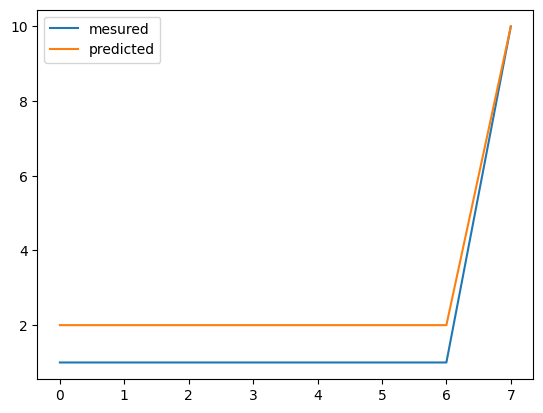

+---------------------+-------------------------------+
|                     |   systematical overestimation |
|---------------------+-------------------------------|
| BravaisPearson_corr |                      1        |
| (E)NSE              |                      0.901235 |
| (d)IoA              |                      0.972973 |
| (E)NSE_mod_J=3      |                      0.985953 |
| (d)IoA_mod_J=3      |                      0.998215 |
| (E)NSE_rel          |                      0.554012 |
| (d)IoA_rel          |                      0.877956 |
+---------------------+-------------------------------+


In [16]:
df_test = pd.DataFrame({'mesured': [1,1,1,1,1,1,1,10], 'predicted': [2,2,2,2,2,2,2,10]})
df_test.plot()
plt.show()

J_mod = 3

df_2h_ev = execute_evaluation(observed = df_test['mesured'] , predicted = df_test['predicted'], J = J_mod)
ComparisonCriteria_Names = list(["BravaisPearson_corr","(E)NSE","(d)IoA","(E)NSE_mod_J="+str(J_mod),"(d)IoA_mod_J="+str(J_mod),"(E)NSE_rel","(d)IoA_rel"])
cethegorical_index = pd.CategoricalIndex(ComparisonCriteria_Names)
Mesurement_df = pd.DataFrame( data = {"systematical overestimation":df_2h_ev,
                                     }, index = cethegorical_index)
print(tabulate(Mesurement_df , headers='keys', tablefmt='psql'))

# Resluts 2, 3 and 4 hours comparison residual LSTM Architecture

In [23]:
df_origin_2h = pd.read_csv("result_folder/result_2h.csv", delimiter=";", engine="python", index_col=0)
df_origin_3h = pd.read_csv("result_folder/result_3h.csv", delimiter=";", engine="python", index_col=0)
df_origin_4h = pd.read_csv("result_folder/result_4h.csv", delimiter=";", engine="python", index_col=0)

df_2h = df_origin_2h.copy()
df_3h = df_origin_3h.copy()
df_4h = df_origin_4h.copy()


"""
comparison = df
plt.figure(figsize = (5,3))
plt.plot(comparison["mesured"][:],label="level mesured Sennhuette", color =  "black")
plt.plot(comparison["predicted"][:], linestyle  ="-.",label="level predicted Sennhuette", color = "green")
plt.legend(loc="upper right", fontsize ="small")
plt.show()
"""


J_mod = 3

comparison_df_2h = execute_evaluation(observed = df_2h["mesured"] , predicted = df_2h["predicted"], J = J_mod)
comparison_df_3h = execute_evaluation(observed = df_3h["mesured"] , predicted = df_3h["predicted"], J = J_mod)
comparison_df_4h = execute_evaluation(observed = df_4h["mesured"] , predicted = df_4h["predicted"], J = J_mod)


ComparisonCriteria_Names = list(["BravaisPearson_corr","(E)NSE","(d)IoA","(E)NSE_mod_J="+str(J_mod),"(d)IoA_mod_J="+str(J_mod),"(E)NSE_rel","(d)IoA_rel"])
cethegorical_index = pd.CategoricalIndex(ComparisonCriteria_Names)

Mesurement_df = pd.DataFrame( data = {"2h prediction Sennheutte":comparison_df_2h,
                                      "3h prediction Sennheutte":comparison_df_3h,
                                      "4h prediction Sennheutte":comparison_df_4h,
                                     
                                     }, index = cethegorical_index)
print(tabulate(Mesurement_df , headers="keys", tablefmt="psql"))
Mesurement_df.to_csv("overall_comparison_residual_LSTM_architecture.csv", sep =";")

+---------------------+----------------------------+----------------------------+----------------------------+
|                     |   2h prediction Sennheutte |   3h prediction Sennheutte |   4h prediction Sennheutte |
|---------------------+----------------------------+----------------------------+----------------------------|
| BravaisPearson_corr |                   0.986439 |                   0.98548  |                   0.979918 |
| (E)NSE              |                   0.969374 |                   0.969187 |                   0.953041 |
| (d)IoA              |                   0.991751 |                   0.991836 |                   0.987124 |
| (E)NSE_mod_J=3      |                   0.970967 |                   0.976292 |                   0.96227  |
| (d)IoA_mod_J=3      |                   0.996587 |                   0.996759 |                   0.99474  |
| (E)NSE_rel          |                   0.955158 |                   0.980537 |                   0.907843 |
|

# Resluts 2, 3 and 4 hours comparison simple LSTM Architecture

In [24]:
df_origin_2h = pd.read_csv("result_folder/simple_LSTM_architecture/result_2h.csv", delimiter=";", engine="python", index_col=0)
df_origin_3h = pd.read_csv("result_folder/simple_LSTM_architecture/result_3h.csv", delimiter=";", engine="python", index_col=0)
df_origin_4h = pd.read_csv("result_folder/simple_LSTM_architecture/result_4h.csv", delimiter=";", engine="python", index_col=0)

df_2h = df_origin_2h.copy()
df_3h = df_origin_3h.copy()
df_4h = df_origin_4h.copy()


"""
comparison = df
plt.figure(figsize = (5,3))
plt.plot(comparison["mesured"][:],label="level mesured Sennhuette", color =  "black")
plt.plot(comparison["predicted"][:], linestyle  ="-.",label="level predicted Sennhuette", color = "green")
plt.legend(loc="upper right", fontsize ="small")
plt.show()
"""


J_mod = 3

comparison_df_2h = execute_evaluation(observed = df_2h["mesured"] , predicted = df_2h["predicted"], J = J_mod)
comparison_df_3h = execute_evaluation(observed = df_3h["mesured"] , predicted = df_3h["predicted"], J = J_mod)
comparison_df_4h = execute_evaluation(observed = df_4h["mesured"] , predicted = df_4h["predicted"], J = J_mod)


ComparisonCriteria_Names = list(["BravaisPearson_corr","(E)NSE","(d)IoA","(E)NSE_mod_J="+str(J_mod),"(d)IoA_mod_J="+str(J_mod),"(E)NSE_rel","(d)IoA_rel"])
cethegorical_index = pd.CategoricalIndex(ComparisonCriteria_Names)

Mesurement_df = pd.DataFrame( data = {"2h prediction Sennheutte":comparison_df_2h,
                                      "3h prediction Sennheutte":comparison_df_3h,
                                      "4h prediction Sennheutte":comparison_df_4h,
                                     
                                     }, index = cethegorical_index)
print(tabulate(Mesurement_df , headers="keys", tablefmt="psql"))
Mesurement_df.to_csv("overall_comparison_simple_LSTM_architecture.csv", sep =";")

+---------------------+----------------------------+----------------------------+----------------------------+
|                     |   2h prediction Sennheutte |   3h prediction Sennheutte |   4h prediction Sennheutte |
|---------------------+----------------------------+----------------------------+----------------------------|
| BravaisPearson_corr |                   0.958124 |                   0.95457  |                   0.953112 |
| (E)NSE              |                   0.829751 |                   0.740522 |                   0.827267 |
| (d)IoA              |                   0.955005 |                   0.923638 |                   0.946689 |
| (E)NSE_mod_J=3      |                   0.944601 |                   0.911347 |                   0.901749 |
| (d)IoA_mod_J=3      |                   0.991871 |                   0.984748 |                   0.980944 |
| (E)NSE_rel          |                   0.327248 |                  -0.236698 |                   0.351514 |
|